<a href="https://colab.research.google.com/github/Bishre313/testing/blob/main/Copy_of_Intermediate__Assessment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#load dat set

In [31]:
train_data=pd.read_csv("/content/car_prediction_data.csv")
train_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


#EDA

In [32]:
train_data.shape

(301, 9)

In [33]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [34]:
train_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [35]:
train_data.duplicated().sum()

np.int64(2)

In [36]:
train_data.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [37]:
train_data.nunique()

,0
Car_Name,98
Year,16
Selling_Price,156
Present_Price,147
Kms_Driven,206
Fuel_Type,3
Seller_Type,2
Transmission,2
Owner,3


#preprocessing

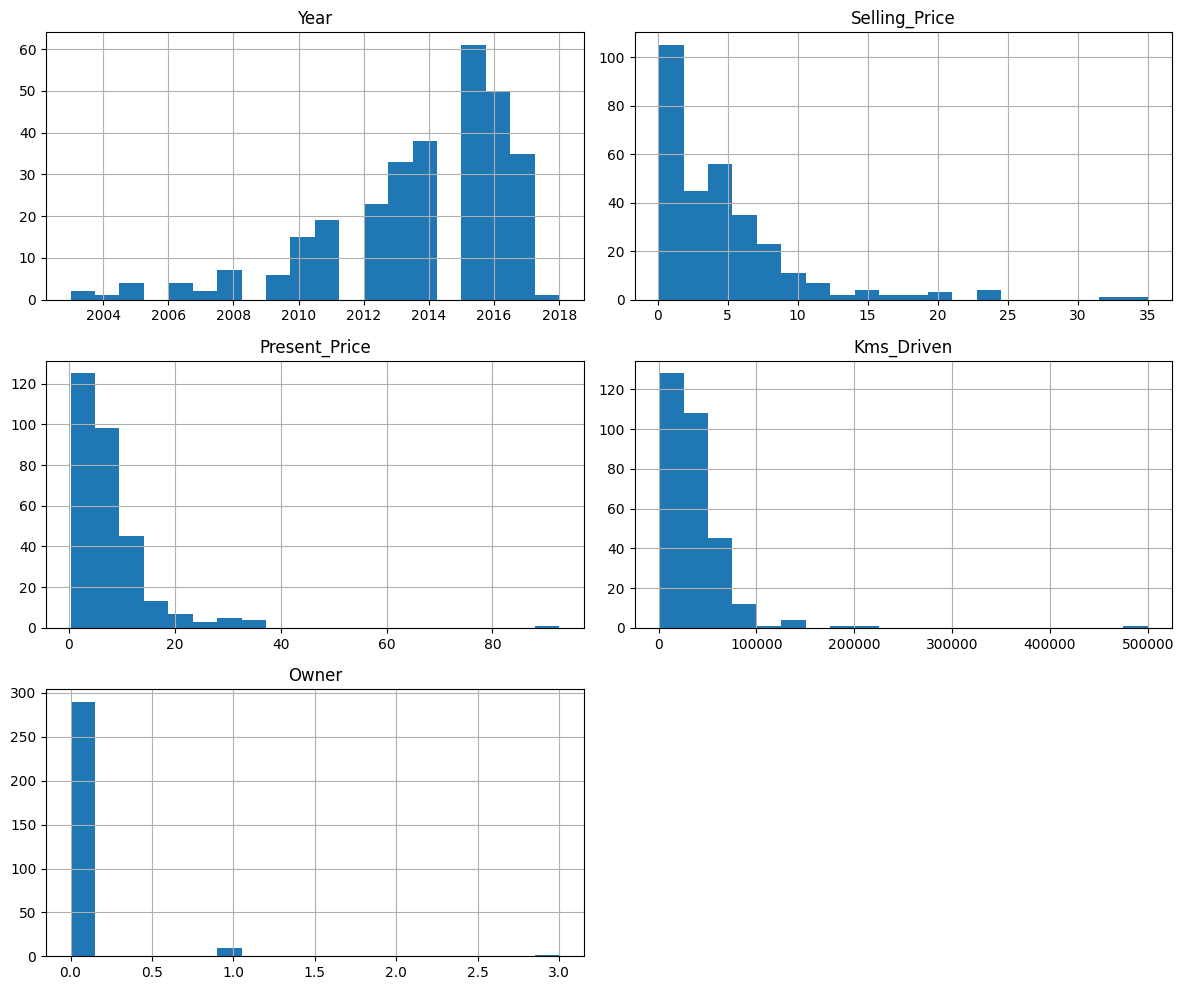

In [38]:
train_data.select_dtypes(include=["number"]).hist(figsize=(12,10), bins=20)
plt.tight_layout()
plt.show()

In [39]:
train_data.replace('?',np.nan,inplace=True)

In [40]:
train_data.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [41]:
#replasing numerical with mean
train_data['previous_year_rating']=train_data['previous_year_rating'].fillna(train_data['previous_year_rating'].median())

KeyError: 'previous_year_rating'

In [ ]:
#replasing categorical  with mode
train_data['education']=train_data['education'].fillna(train_data['education'].mode()[0])

In [ ]:
train_data.isnull().sum()

#out layers

In [ ]:
out_layer=train_data.plot(kind='box',figsize=(13,13))

In [ ]:
num_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    plt.figure()
    plt.boxplot(train_data[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()


#outlayer handaling

In [ ]:
handling=("age","length_of_service")
for i in handling:

  q1=np.percentile(train_data[i],25)
  q3=np.percentile(train_data[i],75)
  iqr=q3-q1

  up_val=q3+(1.5*iqr)
  low_val=q1-(1.5*iqr)
#clipping
  train_data[i]=train_data[i].clip(lower=low_val,upper=up_val)

In [ ]:
out_layer=train_data.plot(kind='box',figsize=(13,13))

#Encoding

In [ ]:
train_data.nunique()

In [ ]:
 train_data.head()

In [ ]:
#corrilation
train1=train_data.select_dtypes(include=['number'])
corr=train1.corr()
corr

In [ ]:
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [ ]:
num_cols = train_data.select_dtypes(include=['number']).columns
cat_cols = train_data.select_dtypes(include=['object']).columns

In [ ]:
data_encoded = pd.get_dummies(train_data, columns=cat_cols, drop_first=True).astype(int)

In [ ]:
data_encoded.head()

#scaling


In [ ]:
scaler =StandardScaler()
scaled_data=scaler.fit_transform(data_encoded)
scaled_data

#split



In [ ]:
X=train_data.drop('is_promoted',axis=1)
y=train_data['is_promoted']

In [ ]:
cat_cols = X.select_dtypes(include='object').columns
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


#models


#random forest model

In [ ]:

random_forest = RandomForestClassifier(random_state=42)

# Train model
random_forest.fit(X_train, y_train)

# Predictions
random_forest_pred = random_forest.predict(X_test)

# Accuracy
print("Training Accuracy :", random_forest.score(X_train, y_train))
print("Testing Accuracy :", random_forest.score(X_test, y_test))


In [ ]:

# Model Evaluation
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

# Predict on test data
y_test_pred = random_forest.predict(X_test)

# Calculate metrics (safe for binary & multiclass)
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print metrics
print("Accuracy  :", accuracy)
print("Precision :", precision)
print("Recall    :", recall)
print("F1 Score  :", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:\n", cm)

# Detailed Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred))


#logic regression


In [ ]:
logic_regression= LogisticRegression(max_iter=1000)
logic_regression.fit(X_train, y_train)

logic_regression_pred =logic_regression.predict(X_test)

print("Training Accuracy :", logic_regression.score(X_train, y_train))
print("Testing Accuracy :", logic_regression.score(X_test, y_test))

In [ ]:
#evaluation
y_test_pred = logic_regression.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall   :", recall_score(y_test, y_test_pred))
print("F1 Score :", f1_score(y_test, y_test_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

#KNN


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

print("Training Accuracy :", knn.score(X_train, y_train))
print("Testing  Accuracy :", knn.score(X_test, y_test))

In [ ]:
#evaluation
y_test_pred = knn.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall   :", recall_score(y_test, y_test_pred))
print("F1 Score :", f1_score(y_test, y_test_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

In [ ]:
submit = []
def evaluate_model(model, model_name):
      # Predict on test data
      y_test_pred = model.predict(X_test)
      submit.append({
        "Model": model_name,
        "Train Accuracy": model.score(X_train, y_train),
        "Validation Accuracy": accuracy_score(y_test, y_test_pred),
        "Precision": precision_score(y_test, y_test_pred),
        "Recall": recall_score(y_test, y_test_pred),
        "F1 Score": f1_score(y_test, y_test_pred)
    })


In [ ]:
evaluate_model(random_forest, "Random Forest")# Random Forest
evaluate_model(logic_regression , "Logistic Regression")# Logistic Regression
evaluate_model(knn, "KNN")# KNN

submit_data = pd.DataFrame(submit)
submit_data


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

param_dist = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, 15],
    'criterion': ['gini', 'entropy']
}

_base = RandomForestClassifier(random_state=42)

tuned_search = RandomizedSearchCV(
    estimator=random_forest,
    param_distributions=param_dist,
    n_iter=3,
    cv=2,
    scoring='f1',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

print("Starting ultra-fast search...")
tuned_search.fit(X_train, y_train)

best_rf_model = tuned_search.best_estimator_
print("Done! Best Params:", tuned_search.best_params_)

In [ ]:
val_pred_original =random_forest.predict(X_test)
val_pred_tuned = best_rf_model.predict(X_test)

metrics = {
    'Metric': ['Accuracy', 'F1-Score'],
    'Before Tuning': [
        accuracy_score(y_test, val_pred_original),
        f1_score(y_test, val_pred_original)
    ],
    'After Tuning': [
        accuracy_score(y_test, val_pred_tuned),
        f1_score(y_test, val_pred_tuned)
    ]
}

comparison_df = pd.DataFrame(metrics)
print("Model Performance Comparison (Validation Set) ")
print(comparison_df)

improvement = ((metrics['After Tuning'][1] - metrics['Before Tuning'][1]) / metrics['Before Tuning'][1]) * 100
print(f"\nOverall F1-Score Improvement: {improvement:.2f}%")